In [137]:
# dependencias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from statsmodels.tsa.stattools import adfuller, acf, pacf, q_stat
from statsmodels.tsa.api import SARIMAX
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox, jarque_bera
from scipy.signal import periodogram
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


Asia 


In [108]:
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,7.300000,7.000000,6.900000,6.300000,6.000000,5.700000,6.800000,6.400000,6.100000,NaN
1,NaN,AFE,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,15.000000,15.000000,15.000000,14.836667,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,16.382271,16.881862,15.780504,15.806100,20.677004,19.295367,19.655895,19.403155,20.117211,16.920862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,10.615000,8.320000,7.446800,6.832700,6.654058,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep. del",YEM,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Tasa de interés activa (%),FR.INR.LEND,6.208333,6.833333,6.208333,5.5,5.791667,6.916667,...,9.125000,9.416667,10.458333,10.375000,10.083333,10.125000,7.708333,7.041667,8.791667,11.500000
264,Zambia,ZMB,Tasa de interés activa (%),FR.INR.LEND,NaN,NaN,NaN,NaN,NaN,NaN,...,11.573333,13.250000,15.500000,12.375000,9.791667,10.291667,9.479167,NaN,NaN,NaN


In [ ]:
(Asia, Oriente Medio,
Africa, Oceania, America, Europa), incluyendo de América a México


Kuwait medio oriente 



# 2.1. Asia 


* Zambia -- África al sur del Sahara (excluido altos ingresos)

* Líbano -- Oriente Medio y Norte de África (excluido altos ingresos)

* Malasia-- Asia

*  Australia      -- Oceania

*  Canadá      -- América 

*  Azerbaiyán  -- Europa

*  mex      -- América a México


# 2.1.1 Seleccion de datos
Para el analisis de la region de Asia se seleccionaron las tasas de interes activa

In [76]:
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df = df.query("`Country Name` == 'México'")

# Extraemos solo las columnas de los años (de 1960 a 2023)
df = df.iloc[:, 4:].transpose()

# Nombramos la columna de la serie como 'Tasa de interés activa (%)'
df.columns = ['Tasa de interés activa (%)']

# Aseguramos que los valores son de tipo float
df = df.astype(float)
df


,Tasa de interés activa (%)
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2019,8.429167
2020,6.341667
2021,5.265833
2022,8.179167


In [77]:
df['Tasa de interés activa (%)'].value_counts()

Tasa de interés activa (%)
18.225000    1
7.065000     1
8.179167     1
5.265833     1
6.341667     1
8.429167     1
8.040000     1
7.332500     1
4.754167     1
3.439167     1
3.551667     1
4.270833     1
4.680833     1
4.910833     1
5.280833     1
8.705768     1
19.300000    1
7.560833     1
7.511835     1
9.695000     1
7.438333     1
7.022500     1
8.210833     1
12.795000    1
16.928333    1
23.742500    1
26.358333    1
22.140000    1
36.385833    1
59.431667    1
11.591667    1
Name: count, dtype: int64

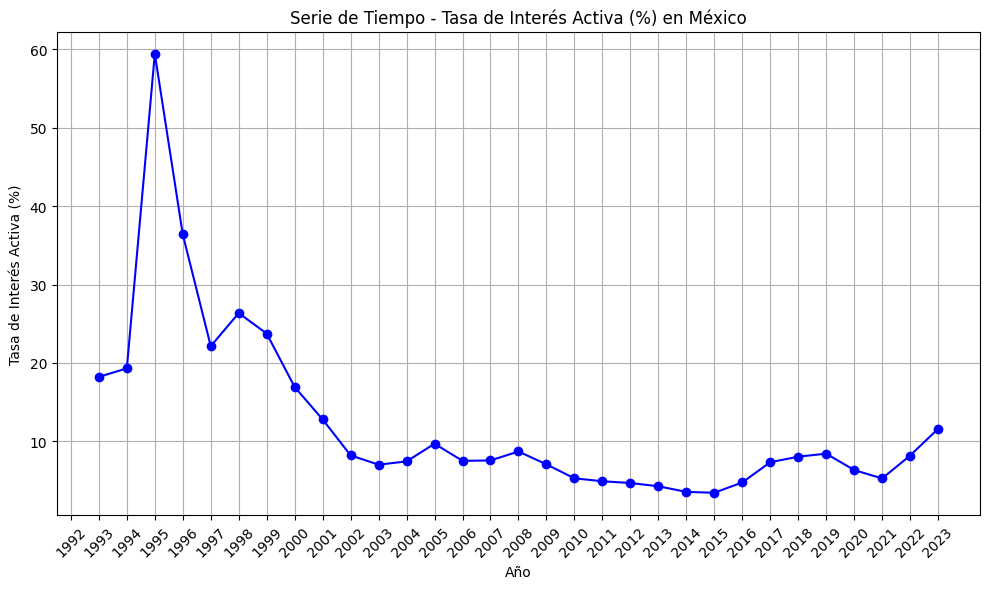

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Tasa de interés activa (%)'], marker='o', linestyle='-', color='b')
plt.title('Serie de Tiempo - Tasa de Interés Activa (%) en México')
plt.xlabel('Año')
plt.ylabel('Tasa de Interés Activa (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# Aplicar la prueba ADF
result = adfuller(df['Tasa de interés activa (%)'].dropna(), autolag='AIC')

# Extraer los resultados
valor_p = result[1]
num_lags = result[2]
valores_criticos = result[4]

# Mostrar los resultados
print(f"Valor p: {valor_p}")
print(f"Número de lags usados: {num_lags}")
print("Valores críticos:")
for key, value in valores_criticos.items():
    print(f"  {key}: {value}")

Valor p: 0.8219995278471501
Número de lags usados: 0
Valores críticos:
  1%: -3.7238633119999998
  5%: -2.98648896
  10%: -2.6328004


In [85]:
df 

,Tasa de interés activa (%)
1993,18.225000
1994,19.300000
1995,59.431667
1996,36.385833
1997,22.140000
1998,26.358333
1999,23.742500
2000,16.928333
2001,12.795000
2002,8.210833


Valor p de la prueba ADF: 0.8219995278471501
La serie no es estacionaria. Aplicando Box-Cox...
Valor de lambda en la transformación Box-Cox: 2.416792607046358
Valor p (después de Box-Cox): 0.7477792080626949


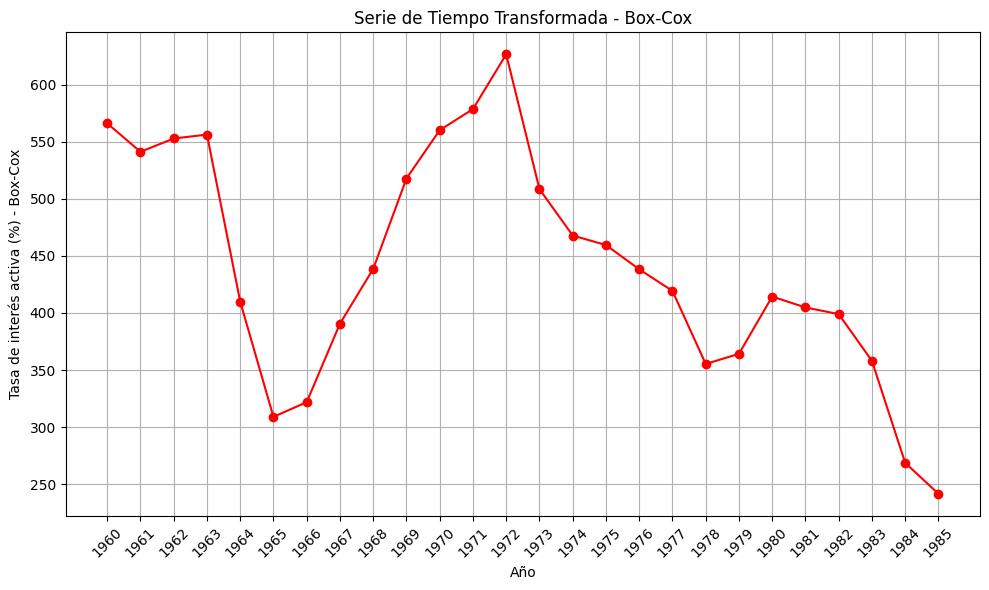

In [70]:
result = adfuller(df['Tasa de interés activa (%)'].dropna(), autolag='AIC')

# Extraemos el valor p de la prueba
valor_p = result[1]

# Mostrar el valor p y tomar una decisión
print(f"Valor p de la prueba ADF: {valor_p}")

# Si la serie no es estacionaria (valor p > 0.05), aplicamos Box-Cox
if valor_p > 0.05:
    print("La serie no es estacionaria. Aplicando Box-Cox...")
    
    # Extraemos la serie sin NaN
    df_clean = df['Tasa de interés activa (%)'].dropna()

    # Verificamos si hay valores negativos o cero y los ajustamos
    if (df_clean <= 0).any():
        df_clean = df_clean + abs(df_clean.min()) + 1  # Agregamos el valor mínimo absoluto y 1

    # Aplicamos la transformación Box-Cox
    df_boxcox, lambda_ = stats.boxcox(df_clean)

    # Imprimimos el valor de lambda
    print(f"Valor de lambda en la transformación Box-Cox: {lambda_}")

    # Realizamos nuevamente la prueba ADF sobre la serie transformada
    result_boxcox = adfuller(df_boxcox)
    valor_p_boxcox = result_boxcox[1]
    print(f"Valor p (después de Box-Cox): {valor_p_boxcox}")
    
    # Graficamos solo si la serie fue transformada
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[:len(df_boxcox)], df_boxcox, marker='o', linestyle='-', color='r')
    plt.title('Serie de Tiempo Transformada - Box-Cox')
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés activa (%) - Box-Cox')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("La serie ya es estacionaria. No se aplica Box-Cox.")

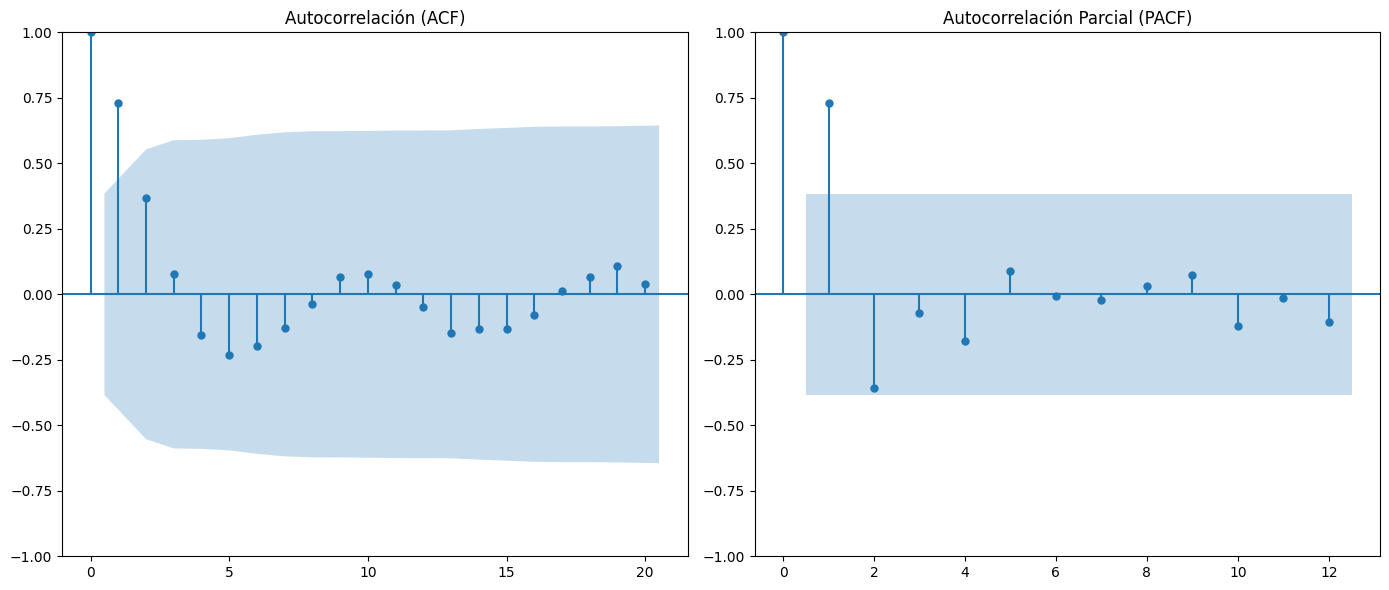

In [71]:
# Selección de la serie
series_to_plot = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Determinamos el número de lags según el tamaño de la serie
max_lags = min(len(series_to_plot) - 1, 20)  # Usamos el mínimo entre 20 o el tamaño de la serie - 1
max_lags_pacf = len(series_to_plot) // 2 - 1  # Para PACF, el máximo es el 50% del tamaño de la serie

# Si max_lags es mayor que el máximo permitido para PACF, lo ajustamos
max_lags_pacf = min(max_lags_pacf, max_lags)

# Crear las gráficas de ACF y PACF
plt.figure(figsize=(14, 6))

# Subgráfico para ACF
plt.subplot(1, 2, 1)
plot_acf(series_to_plot, lags=max_lags, ax=plt.gca())
plt.title('Autocorrelación (ACF)')

# Subgráfico para PACF
plt.subplot(1, 2, 2)
plot_pacf(series_to_plot, lags=max_lags_pacf, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF)')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

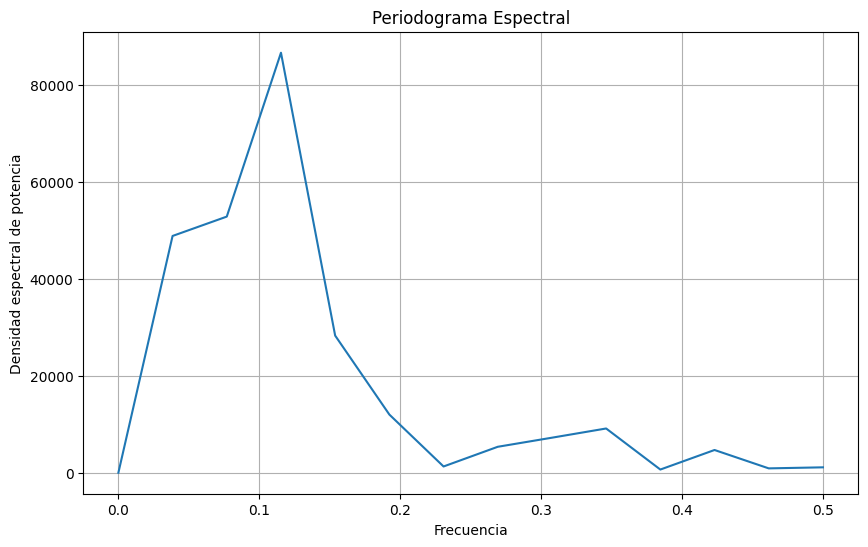

In [72]:
# Selección de la serie
series_to_plot = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Calcular el periodograma
frequencies, power = periodogram(series_to_plot)

# Graficar el periodograma espectral
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power)
plt.title('Periodograma Espectral')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\oscar\AppData\Local\Packages\PythonSo

Parámetros del modelo ajustado:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sun, 17 Nov 2024   AIC                             10.000
Time:                                    11:43:14   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 26                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3593         -0        inf      0.000      -0.359      -0.359
ma.

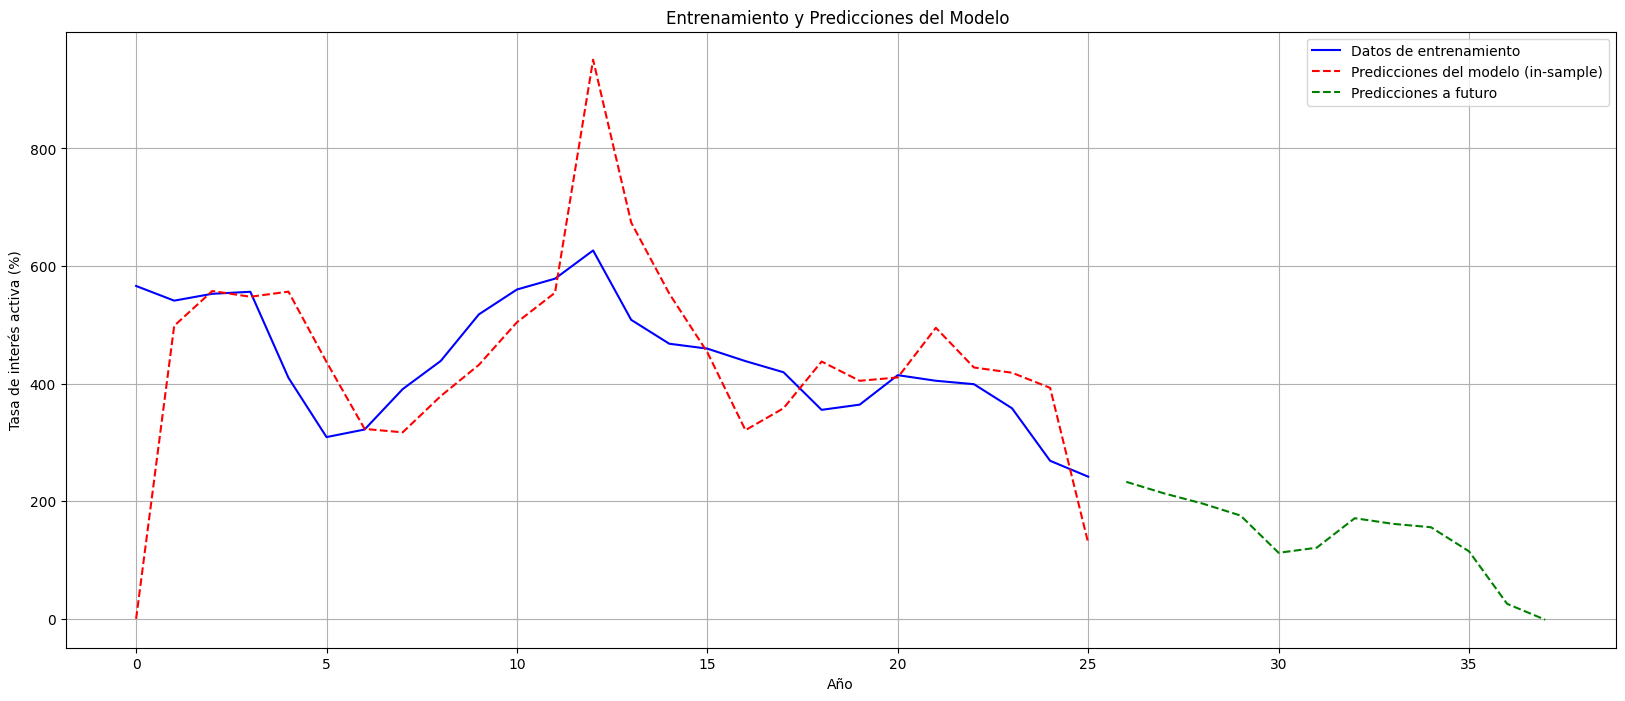

RMSE (Error Cuadrático Medio): 150.22001251103669
MAE (Error Absoluto Medio): 96.09501971286812


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
# Selección de la serie de datos (con o sin transformación Box-Cox)
series_to_train = df_boxcox if valor_p > 0.05 else df['Tasa de interés activa (%)'].dropna()

# Ajustar el modelo SARIMA automáticamente con la función SARIMAX
sarima_model = SARIMAX(series_to_train,
                       order=(1, 1, 1),  # Ajustar p, d, q según el análisis previo o dejar como 1, 1, 1 como punto de partida
                       seasonal_order=(1, 1, 1, 12),  # Ajustar P, D, Q, s (estacionalidad, s=12 si es anual)
                       enforce_stationarity=False, 
                       enforce_invertibility=False)

# Ajustar el modelo
sarima_model_fit = sarima_model.fit(disp=False)

# Mostrar los parámetros ajustados
print("Parámetros del modelo ajustado:")
print(sarima_model_fit.summary())

# Realizar las predicciones para el conjunto de entrenamiento (in-sample predictions)
train_predictions = sarima_model_fit.predict(start=0, end=len(series_to_train)-1, dynamic=False)

# Predicciones a futuro (por ejemplo, los próximos 12 períodos)
forecast_steps = 12
forecast = sarima_model_fit.predict(start=len(series_to_train), end=len(series_to_train)+forecast_steps-1)

# Graficar los datos originales y las predicciones (in-sample y a futuro)
plt.figure(figsize=(20, 8))

# Graficar los datos de entrenamiento
plt.plot(series_to_train, label='Datos de entrenamiento', color='blue')

# Graficar las predicciones del modelo (in-sample)
plt.plot(train_predictions, label='Predicciones del modelo (in-sample)', color='red', linestyle='--')

# Graficar las predicciones futuras
plt.plot(range(len(series_to_train), len(series_to_train) + forecast_steps), forecast, label='Predicciones a futuro', color='green', linestyle='--')

# Títulos y etiquetas
plt.title('Entrenamiento y Predicciones del Modelo ')
plt.xlabel('Año')
plt.ylabel('Tasa de interés activa (%)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Evaluación del modelo en el conjunto de entrenamiento (RMSE y MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(series_to_train, train_predictions, squared=False)
mae = mean_absolute_error(series_to_train, train_predictions)

print(f"RMSE (Error Cuadrático Medio): {rmse}")
print(f"MAE (Error Absoluto Medio): {mae}")


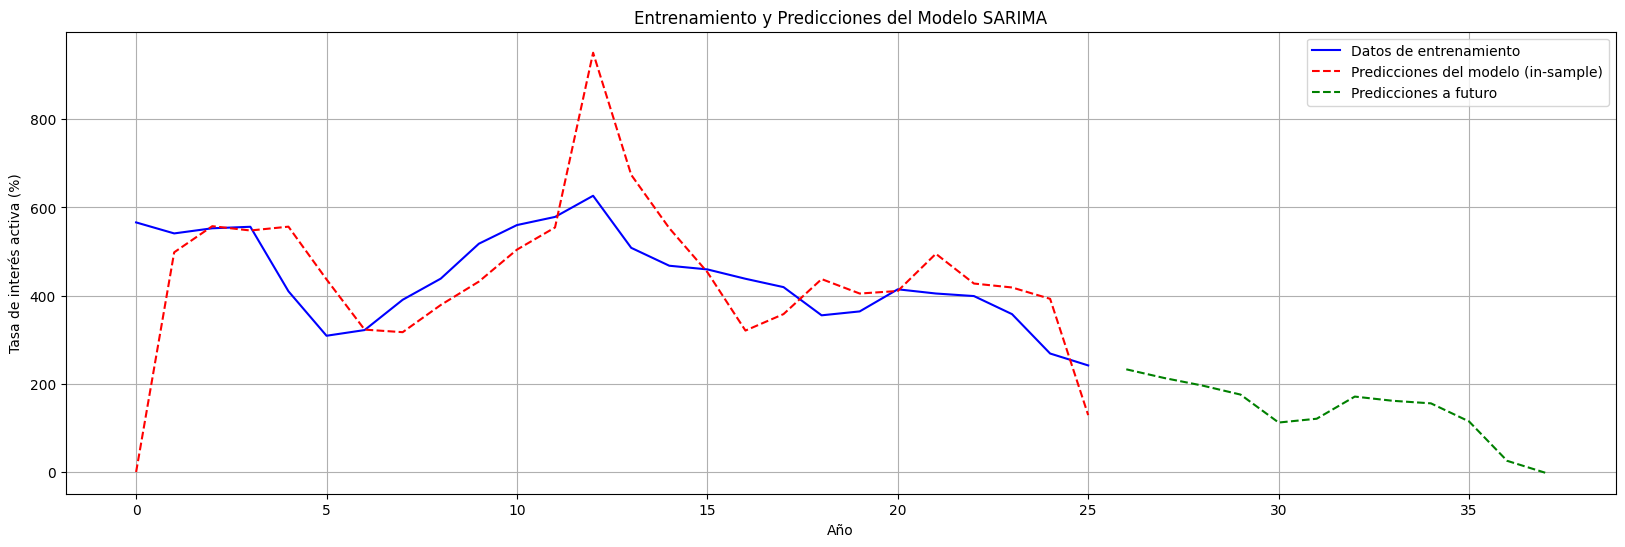

In [74]:
plt.figure(figsize=(20, 6))

# Graficar los datos de entrenamiento
plt.plot(series_to_train, label='Datos de entrenamiento', color='blue')

# Graficar las predicciones del modelo (in-sample)
plt.plot(train_predictions, label='Predicciones del modelo (in-sample)', color='red', linestyle='--')

# Graficar las predicciones futuras
plt.plot(range(len(series_to_train), len(series_to_train) + forecast_steps), forecast, label='Predicciones a futuro', color='green', linestyle='--')

# Títulos y etiquetas
plt.title('Entrenamiento y Predicciones del Modelo SARIMA')
plt.xlabel('Año')
plt.ylabel('Tasa de interés activa (%)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [75]:
import pyperclip
# Imprime el resumen en la consola
summary_text = sarima_model_fit.summary().as_text()
print(summary_text)

# Copia el resumen al portapapeles
pyperclip.copy(summary_text)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sun, 17 Nov 2024   AIC                             10.000
Time:                                    11:46:20   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 26                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3593         -0        inf      0.000      -0.359      -0.359
ma.L1          0.5726         -0   

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
    \subsection{Azerbaiyán  -- Europa }

    \subsubsection{Observaciones generales}

    \subsubsection{Análisis Exploratorio de Datos La Serie de Tiempo - Tasa de Interés Activa (\%)}

    
    \vspace{-0.4cm}
    \begin{figure}[H]
        \includegraphics[width=1\textwidth]{México.png}
        \caption{}
        \label{}
    \end{figure}
    \vspace{-0.4cm}
    
    \subsubsection{Uso de Box-cox de ser necesario}
    
    Texto explicacion
    
    Valor p de la prueba ADF: \\
        
    La serie no es estacionaria. Aplicando Box-Cox...\\
    
    Valor de lambda en la transformación Box-Cox: \\
    
    Valor p (después de Box-Cox): \\
    
    \vspace{-0.4cm}
    \begin{figure}[H]
        \includegraphics[width=1\textwidth]{México_boxcox.png}
        \caption{}
        \label{}
    \end{figure}
    \vspace{-0.4cm}
    
    \vspace{-0.4cm}
    \begin{figure}[H]
        \includegraphics[width=1\textwidth]{México_acf.png}
        \caption{}
        \label{}
    \end{figure}
    \vspace{-0.4cm}
    
    \subsubsection{Pronostico}
    
    RMSE (Error Cuadrático Medio): \\
    
    MAE (Error Absoluto Medio): \\
    
    \vspace{-0.4cm}
    \begin{figure}[H]
        \includegraphics[width=1\textwidth]{México_modelo.png}
        \caption{}
        \label{}
    \end{figure}
    \vspace{-0.4cm}
    
    {\scriptsize
    \begin{verbatim}
    AQUI CLIPBOARD 
    
    \end{verbatim}
    }

* Zambia -- África al sur del Sahara (excluido altos ingresos)

* Líbano -- Oriente Medio y Norte de África (excluido altos ingresos)

* Malasia-- Asia

*  Australia      -- Oceania

*  Canadá      -- América 

*  Azerbaiyán  -- Europa

*  mex      -- América a México


Los datos no son normales, aplicando Box-Cox...
Lambda de Box-Cox: -0.5354911704968047


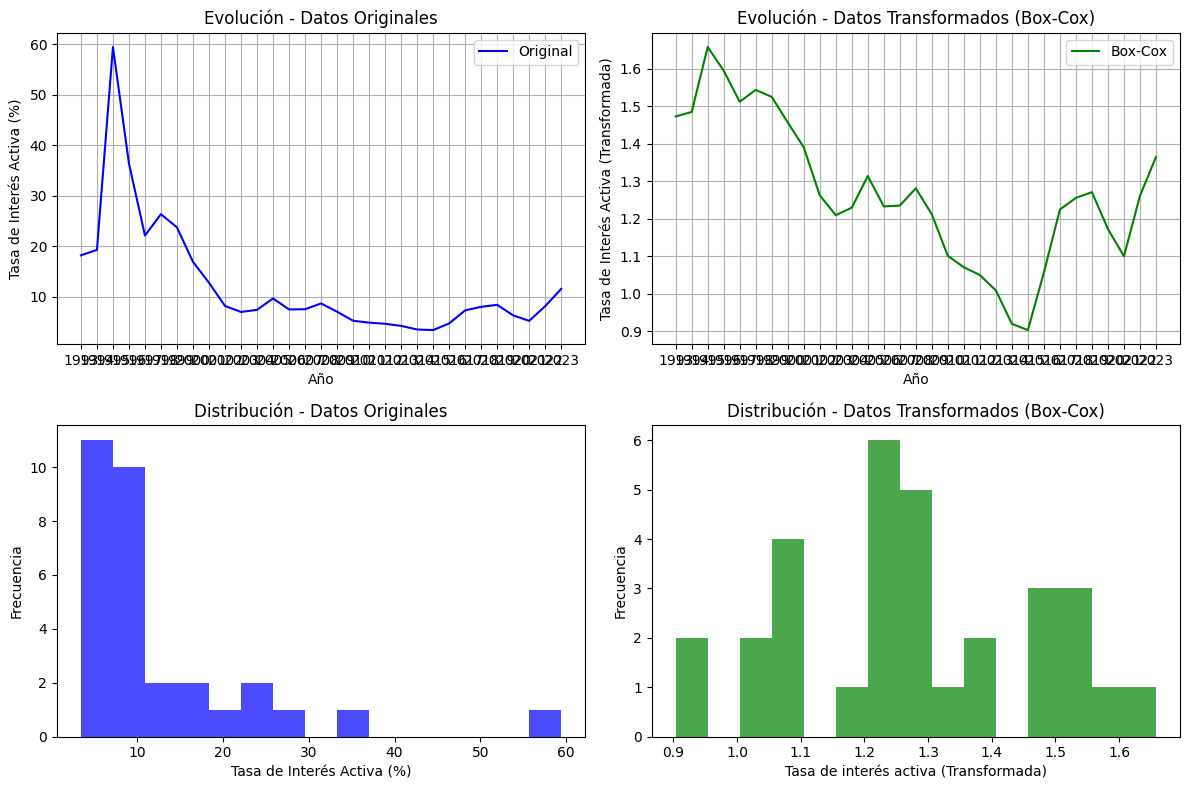

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, normaltest

# Leer los datos (ya hecho previamente)
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df = df.query("`Country Name` == 'México'")

# Extraemos solo las columnas de los años (de 1960 a 2023)
df = df.iloc[:, 4:].transpose()

# Nombramos la columna de la serie como 'Tasa de interés activa (%)'
df.columns = ['Tasa de interés activa (%)']

# Aseguramos que los valores son de tipo float
df = df.astype(float)
df = df.dropna()

# Verifica si los datos son positivos
if (df["Tasa de interés activa (%)"] > 0).all():
    
    # Realiza una prueba de normalidad (Shapiro-Wilk, o cualquier otra)
    _, p_value = normaltest(df["Tasa de interés activa (%)"])
    
    if p_value < 0.05:
        # Si la p-valor es menor a 0.05, significa que los datos no son normales, por lo que se recomienda la transformación.
        print("Los datos no son normales, aplicando Box-Cox...")
        
        # Aplicar transformación Box-Cox
        df["Tasa de interés activa (Box-Cox)"], lambda_bc = boxcox(df["Tasa de interés activa (%)"])
        print(f"Lambda de Box-Cox: {lambda_bc}")
        
        # Graficar comparación antes y después de Box-Cox
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
        # Valores originales
        axes[0, 0].plot(df.index, df["Tasa de interés activa (%)"], color="blue", label="Original")
        axes[0, 0].set_title("Evolución - Datos Originales")
        axes[0, 0].set_xlabel("Año")
        axes[0, 0].set_ylabel("Tasa de Interés Activa (%)")
        axes[0, 0].grid()
        axes[0, 0].legend()
        
        axes[1, 0].hist(df["Tasa de interés activa (%)"], bins=15, color="blue", alpha=0.7)
        axes[1, 0].set_title("Distribución - Datos Originales")
        axes[1, 0].set_xlabel("Tasa de Interés Activa (%)")
        axes[1, 0].set_ylabel("Frecuencia")
        
        # Valores transformados
        axes[0, 1].plot(df.index, df["Tasa de interés activa (Box-Cox)"], color="green", label="Box-Cox")
        axes[0, 1].set_title("Evolución - Datos Transformados (Box-Cox)")
        axes[0, 1].set_xlabel("Año")
        axes[0, 1].set_ylabel("Tasa de Interés Activa (Transformada)")
        axes[0, 1].grid()
        axes[0, 1].legend()
        
        axes[1, 1].hist(df["Tasa de interés activa (Box-Cox)"], bins=15, color="green", alpha=0.7)
        axes[1, 1].set_title("Distribución - Datos Transformados (Box-Cox)")
        axes[1, 1].set_xlabel("Tasa de interés activa (Transformada)")
        axes[1, 1].set_ylabel("Frecuencia")
        
        # Ajustar diseño
        plt.tight_layout()
        plt.show()
    
    else:
        print("Los datos ya son normales, no es necesario aplicar Box-Cox.")
        
else:
    print("Los datos contienen valores negativos o ceros, no es posible aplicar Box-Cox.")


In [36]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba ADF para verificar estacionariedad
adf_result = adfuller(df["Tasa de interés activa (Box-Cox)"] if "Tasa de interés activa (Box-Cox)" in df else df["Tasa de interés activa (%)"])

# Extraer resultados de la prueba
adf_statistic = adf_result[0]
p_value = adf_result[1]
used_lags = adf_result[2]
n_obs = adf_result[3]
critical_values = adf_result[4]

# Imprimir resultados
print(f"Estadístico ADF: {adf_statistic}")
print(f"P-valor: {p_value}")
print(f"Se utilizaron {used_lags} rezagos.")
print(f"Número de observaciones: {n_obs}")
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretar los resultados
if p_value < 0.05:
    print("La serie es estacionaria (p-valor < 0.05).")
else:
    print("La serie no es estacionaria (p-valor >= 0.05).")


Estadístico ADF: -2.1874065233104316
P-valor: 0.21084787088984402
Se utilizaron 2 rezagos.
Número de observaciones: 28
Valores críticos:
   1%: -3.6889256286443146
   5%: -2.9719894897959187
   10%: -2.6252957653061224
La serie no es estacionaria (p-valor >= 0.05).


In [38]:
# Diferenciación simple (1er orden)
df["Tasa de interés activa (Box-Cox) Differenced"] = df["Tasa de interés activa (Box-Cox)"].diff()

# Eliminar el primer valor nulo generado por la diferenciación
df = df.dropna()

# Verificar si la serie diferenciada es estacionaria
adf_result_diff = adfuller(df["Tasa de interés activa (Box-Cox) Differenced"])

# Extraer resultados
adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]

print(f"Estadístico ADF (diferenciado): {adf_statistic_diff}")
print(f"P-valor (diferenciado): {p_value_diff}")

# Interpretar los resultados
if p_value_diff < 0.05:
    print("La serie diferenciada es estacionaria (p-valor < 0.05).")
else:
    print("La serie diferenciada sigue sin ser estacionaria.")


Estadístico ADF (diferenciado): -4.628336714292257
P-valor (diferenciado): 0.00011449531820414432
La serie diferenciada es estacionaria (p-valor < 0.05).


In [39]:
# Diferenciación estacional (por ejemplo, con un período de 12 meses)
df["Tasa de interés activa (Box-Cox) Seasonal Differenced"] = df["Tasa de interés activa (Box-Cox)"].diff(12)

# Eliminar valores nulos
df = df.dropna()

# Verificar estacionariedad después de la diferenciación estacional
adf_result_seasonal_diff = adfuller(df["Tasa de interés activa (Box-Cox) Seasonal Differenced"])

# Extraer resultados
adf_statistic_seasonal_diff = adf_result_seasonal_diff[0]
p_value_seasonal_diff = adf_result_seasonal_diff[1]

print(f"Estadístico ADF (diferenciado estacional): {adf_statistic_seasonal_diff}")
print(f"P-valor (diferenciado estacional): {p_value_seasonal_diff}")

# Interpretar los resultados
if p_value_seasonal_diff < 0.05:
    print("La serie estacionalmente diferenciada es estacionaria (p-valor < 0.05).")
else:
    print("La serie estacionalmente diferenciada sigue sin ser estacionaria.")


Estadístico ADF (diferenciado estacional): -2.939232308226604
P-valor (diferenciado estacional): 0.04097233659565858
La serie estacionalmente diferenciada es estacionaria (p-valor < 0.05).


In [40]:
df["Tasa de interés activa (Log)"] = np.log(df["Tasa de interés activa (Box-Cox)"])


In [41]:
# Realizar nuevamente la prueba ADF después de las transformaciones
adf_result_transformed = adfuller(df["Tasa de interés activa (Box-Cox) Seasonal Differenced"])
print(f"Estadístico ADF (después de transformaciones): {adf_result_transformed[0]}")
print(f"P-valor (después de transformaciones): {adf_result_transformed[1]}")

if adf_result_transformed[1] < 0.05:
    print("La serie transformada es estacionaria.")
else:
    print("La serie aún no es estacionaria.")


Estadístico ADF (después de transformaciones): -2.939232308226604
P-valor (después de transformaciones): 0.04097233659565858
La serie transformada es estacionaria.


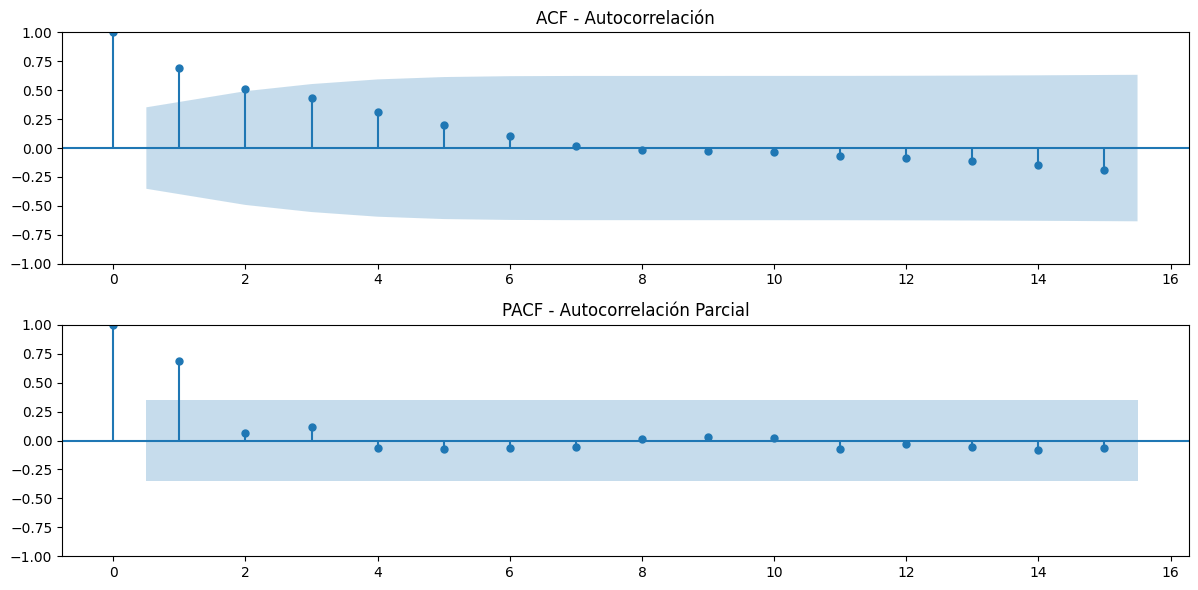

In [31]:
# Calcular los lags máximos permitidos (50% del tamaño del conjunto de datos)
max_lags = len(df) // 2

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plot_acf(df["Tasa de interés activa (%)"], lags=max_lags, ax=plt.gca())
plt.title("ACF - Autocorrelación")

# Gráfico PACF
plt.subplot(2, 1, 2)
plot_pacf(df["Tasa de interés activa (%)"], lags=max_lags, ax=plt.gca())
plt.title("PACF - Autocorrelación Parcial")

plt.tight_layout()
plt.show()


In [33]:
X = df["Tasa de interés activa (Box-Cox)"].shift(1).dropna()  # Usamos la misma serie con un retraso de 1 como exógena

# Aplicamos ARIMAX con auto_arima
model_arimax = auto_arima(df["Tasa de interés activa (Box-Cox)"], exogenous=X, seasonal=False, stepwise=True, trace=True)

# Imprimimos los mejores parámetros encontrados por ARIMAX
print(f"Mejores parámetros para ARIMAX (p, d, q): {model_arimax.order}")

# -------------------------------
# Paso 2: Ajustar el modelo ARIMA con los parámetros encontrados de ARIMAX
# -------------------------------

# Usamos los parámetros (p, d, q) de ARIMAX para ARIMA
p, d, q = model_arimax.order

# Ajustamos el modelo ARIMA
model_arima = ARIMA(df["Tasa de interés activa (Box-Cox)"], order=(p, d, q))
model_arima_fit = model_arima.fit()

# Ver los resultados del ajuste ARIMA
print(model_arima_fit.summary())

# -------------------------------
# Paso 3: Realizar predicciones con ARIMA
# -------------------------------

# Predicciones para los próximos 5 años
forecast_steps = 5
forecast_results = model_arima_fit.forecast(steps=forecast_steps, alpha=0.05)  # Intervalo de confianza 95%

# forecast_results es ahora un arreglo que contiene: 
# - Las predicciones, 
# - Los errores estándar, 
# - Los intervalos de confianza (inferiores y superiores).
forecast = forecast_results[0]
conf_int = forecast_results[2]

# -------------------------------
# Paso 4: Graficar resultados
# -------------------------------

# Asegúrate de que el índice de fechas esté en formato datetime
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq="Y")[1:]

# Convertir el índice de fechas en formato adecuado (a datetime)
forecast_index = pd.to_datetime(forecast_index)

# Verifica que las fechas estén bien formateadas
print(forecast_index)

# Asegúrate de que el modelo ARIMA devuelve los valores adecuados
forecast = forecast[0]  # Si 'forecast' es una tupla, selecciona los valores de la predicción

# Graficar resultados
plt.figure(figsize=(10, 6))

# Datos de entrenamiento
plt.plot(df.index, df["Tasa de interés activa (Box-Cox)"], label="Datos de Entrenamiento", color="blue")

# Predicciones
plt.plot(forecast_index, forecast, label="Predicciones", color="red")

# Intervalo de confianza (95%)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label="Intervalo de Confianza 95%")

# Añadir etiquetas y leyenda
plt.title("Predicciones de Tasa de Interés Activa (Box-Cox)")
plt.xlabel("Año")
plt.ylabel("Tasa de Interés Activa (Transformada)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
# -------------------------------
# Paso 5: Imprimir los parámetros y efectividad del modelo
# -------------------------------

print(f"Parámetros del modelo ARIMA: p={p}, d={d}, q={q}")
print(f"Intervalo de confianza (95%) de la última predicción: {conf_int[-1]}")

# También puedes verificar el AIC o BIC para evaluar la efectividad del modelo
print(f"AIC del modelo ARIMA: {model_arima_fit.aic}")
print(f"BIC del modelo ARIMA: {model_arima_fit.bic}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-59.780, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-58.456, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-58.938, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-62.208, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-60.403, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-60.829, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-61.431, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-60.130, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-64.153, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-62.762, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-63.296, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-60.928, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-61.790, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.860 seconds
Mejores parámetros para ARIMAX (p, 

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

IndexError: invalid index to scalar variable.

In [ ]:
df

In [25]:
X = df["Tasa de interés activa (Box-Cox)"].shift(1).dropna()  # Usamos la misma serie con un retraso de 1 como exógena

# Aplicamos ARIMAX con auto_arima
model_arimax = auto_arima(df["Tasa de interés activa (Box-Cox)"], exogenous=X, seasonal=False, stepwise=True, trace=True)

# Imprimimos los mejores parámetros encontrados por ARIMAX
print(f"Mejores parámetros para ARIMAX (p, d, q): {model_arimax.order}")

# -------------------------------
# Paso 2: Ajustar el modelo ARIMA con los parámetros encontrados de ARIMAX
# -------------------------------

# Usamos los parámetros (p, d, q) de ARIMAX para ARIMA
p, d, q = model_arimax.order

# Ajustamos el modelo ARIMA
model_arima = ARIMA(df["Tasa de interés activa (Box-Cox)"], order=(p, d, q))
model_arima_fit = model_arima.fit()

# Ver los resultados del ajuste ARIMA
print(model_arima_fit.summary())

# -------------------------------
# Paso 3: Realizar predicciones con ARIMA
# -------------------------------

# Predicciones para los próximos 5 años
forecast_steps = 5
forecast, stderr, conf_int = model_arima_fit.forecast(steps=forecast_steps, alpha=0.05)  # Intervalo de confianza 95%

# -------------------------------
# Paso 4: Graficar resultados
# -------------------------------

plt.figure(figsize=(10, 6))

# Datos de entrenamiento
plt.plot(df.index, df["Tasa de interés activa (Box-Cox)"], label="Datos de Entrenamiento", color="blue")

# Predicciones
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq="Y")[1:]  # Rango de fechas para las predicciones
plt.plot(forecast_index, forecast, label="Predicciones", color="red")

# Intervalo de confianza (95%)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label="Intervalo de Confianza 95%")

# Añadir etiquetas y leyenda
plt.title("Predicciones de Tasa de Interés Activa (Box-Cox)")
plt.xlabel("Año")
plt.ylabel("Tasa de Interés Activa (Transformada)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# -------------------------------
# Paso 5: Imprimir los parámetros y efectividad del modelo
# -------------------------------

print(f"Parámetros del modelo ARIMA: p={p}, d={d}, q={q}")
print(f"Intervalo de confianza (95%) de la última predicción: {conf_int[-1]}")

# También puedes verificar el AIC o BIC para evaluar la efectividad del modelo
print(f"AIC del modelo ARIMA: {model_arima_fit.aic}")
print(f"BIC del modelo ARIMA: {model_arima_fit.bic}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-59.780, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-58.456, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-58.938, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-62.208, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-60.403, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-60.829, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-61.431, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-60.130, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-64.153, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-62.762, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-63.296, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-60.928, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-61.790, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.210 seconds
Mejores parámetros para ARIMAX (p, 

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

ValueError: too many values to unpack (expected 3)

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.

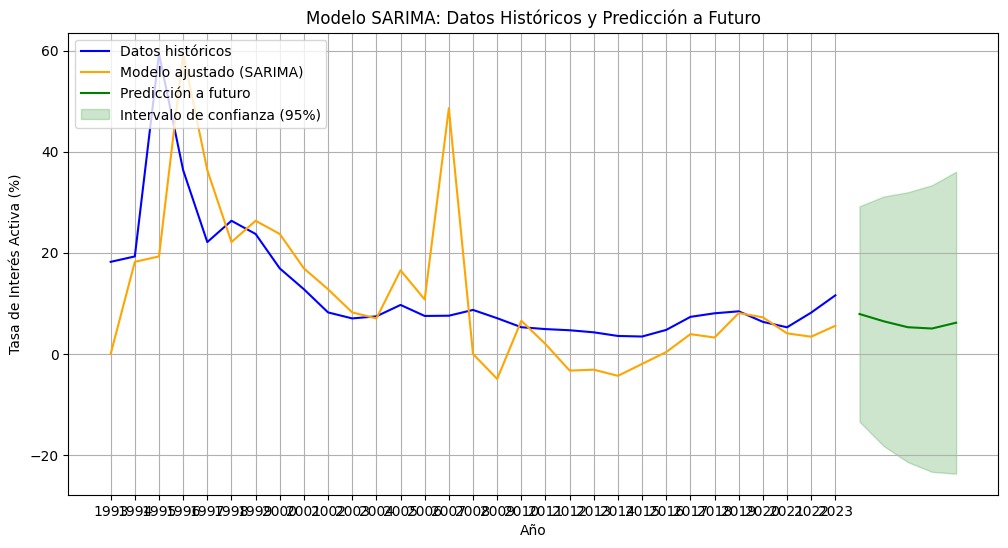

Modelo SARIMA(1, 1, 1) x (1, 1, 1, 12)
RMSE del modelo ajustado: 12.8155


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Establecer p, d, q y P, D, Q en base al análisis de ACF y PACF
p, d, q = 1, 1, 1  # Ajusta según los gráficos
P, D, Q, s = 1, 1, 1, 12  # Ajusta el componente estacional si aplica (ejemplo: anual con s=12)

# Separar datos para entrenamiento y predicción futura
train = df["Tasa de interés activa (%)"]
future_steps = 5  # Número de predicciones a futuro

# Modelo SARIMA
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit(disp=False)

# Predicción a futuro
forecast = sarima_model_fit.get_forecast(steps=future_steps)
forecast_index = range(len(train), len(train) + future_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Graficar datos históricos, modelo ajustado y predicción
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Datos históricos", color="blue")
plt.plot(train.index, sarima_model_fit.fittedvalues, label="Modelo ajustado (SARIMA)", color="orange")
plt.plot(forecast_index, forecast_values, label="Predicción a futuro", color="green")
plt.fill_between(
    forecast_index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color="green",
    alpha=0.2,
    label="Intervalo de confianza (95%)",
)
plt.legend(loc="upper left")
plt.title("Modelo SARIMA: Datos Históricos y Predicción a Futuro")
plt.xlabel("Año")
plt.ylabel("Tasa de Interés Activa (%)")
plt.grid()
plt.show()

# Imprimir los parámetros p, d, q, P, D, Q, s y el RMSE
rmse = np.sqrt(mean_squared_error(train, sarima_model_fit.fittedvalues))
print(f"Modelo SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {s})")
print(f"RMSE del modelo ajustado: {rmse:.4f}")


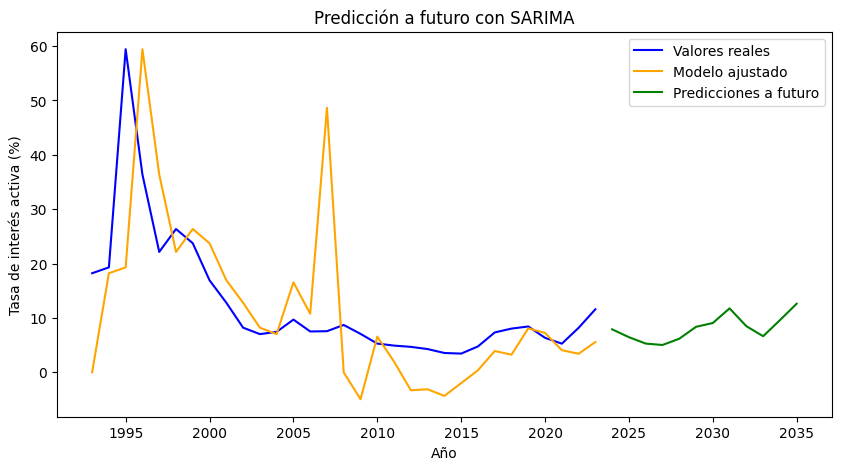

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aseguramos que el índice es de tipo datetime (si es numérico)
df.index = pd.to_datetime(df.index, format="%Y")

# Generar proyecciones a futuro (12 pasos)
forecast_steps = 12
forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Crear rango de fechas para la predicción
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS')

# Gráfico: Valores reales y predicciones a futuro
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Tasa de interés activa (%)"], label="Valores reales", color="blue")
plt.plot(df.index, sarima_model_fit.fittedvalues, label="Modelo ajustado", color="orange")
plt.plot(future_dates, forecast, label="Predicciones a futuro", color="green")
plt.title("Predicción a futuro con SARIMA")
plt.xlabel("Año")
plt.ylabel("Tasa de interés activa (%)")
plt.legend()
plt.show()


Estadístico ADF: -8.781165034036755
P-valor: 2.374560685948724e-14
La serie es estacionaria.


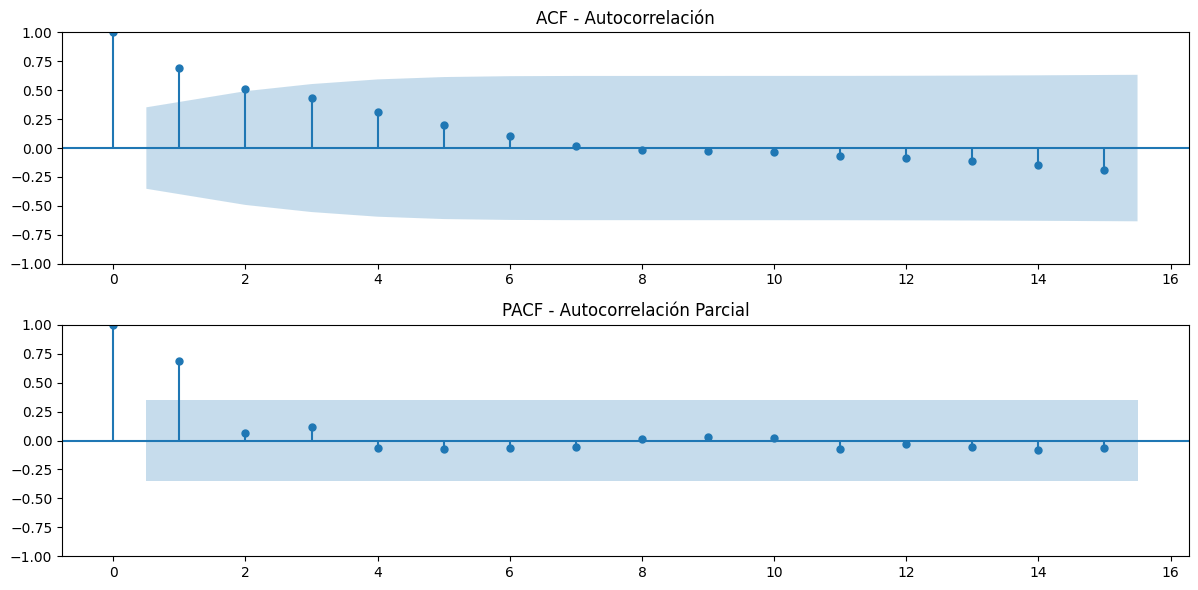

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, normaltest
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar los datos
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df = df.query("`Country Name` == 'México'")

# Extraemos solo las columnas de los años (de 1960 a 2023)
df = df.iloc[:, 4:].transpose()

# Nombramos la columna de la serie como 'Tasa de interés activa (%)'
df.columns = ['Tasa de interés activa (%)']

# Aseguramos que los valores sean de tipo float
df = df.astype(float)
df = df.dropna()

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index, format='%Y')

# 1. Verificar estacionariedad con prueba ADF (Dickey-Fuller)
result = adfuller(df['Tasa de interés activa (%)'])
print(f"Estadístico ADF: {result[0]}")
print(f"P-valor: {result[1]}")
if result[1] < 0.05:
    print("La serie es estacionaria.")
    is_stationary = True
else:
    print("La serie NO es estacionaria.")
    is_stationary = False

# Si la serie no es estacionaria, aplicar Box-Cox y graficar la comparación
if not is_stationary:
    # 2. Aplicar Box-Cox si no es estacionaria
    df["Tasa de interés activa (Box-Cox)"], lambda_bc = boxcox(df["Tasa de interés activa (%)"])
    print(f"Lambda de Box-Cox: {lambda_bc}")

    # 3. Graficar comparación antes y después de Box-Cox
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Valores originales
    axes[0, 0].plot(df.index, df["Tasa de interés activa (%)"], color="blue", label="Original")
    axes[0, 0].set_title("Evolución - Datos Originales")
    axes[0, 0].set_xlabel("Año")
    axes[0, 0].set_ylabel("Tasa de Interés Activa (%)")
    axes[0, 0].grid()
    axes[0, 0].legend()

    axes[1, 0].hist(df["Tasa de interés activa (%)"], bins=15, color="blue", alpha=0.7)
    axes[1, 0].set_title("Distribución - Datos Originales")
    axes[1, 0].set_xlabel("Tasa de Interés Activa (%)")
    axes[1, 0].set_ylabel("Frecuencia")

    # Valores transformados
    axes[0, 1].plot(df.index, df["Tasa de interés activa (Box-Cox)"], color="green", label="Box-Cox")
    axes[0, 1].set_title("Evolución - Datos Transformados (Box-Cox)")
    axes[0, 1].set_xlabel("Año")
    axes[0, 1].set_ylabel("Tasa de Interés Activa (Transformada)")
    axes[0, 1].grid()
    axes[0, 1].legend()

    axes[1, 1].hist(df["Tasa de interés activa (Box-Cox)"], bins=15, color="green", alpha=0.7)
    axes[1, 1].set_title("Distribución - Datos Transformados (Box-Cox)")
    axes[1, 1].set_xlabel("Tasa de interés activa (Transformada)")
    axes[1, 1].set_ylabel("Frecuencia")

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# 4. Realizar análisis ACF y PACF (para la serie original o transformada)
max_lags = len(df) // 2  # Lags máximo permitido

plt.figure(figsize=(12, 6))

# Gráfico ACF
plt.subplot(2, 1, 1)
plot_acf(df["Tasa de interés activa (%)"], lags=max_lags, ax=plt.gca())
plt.title("ACF - Autocorrelación")

# Gráfico PACF
plt.subplot(2, 1, 2)
plot_pacf(df["Tasa de interés activa (%)"], lags=max_lags, ax=plt.gca())
plt.title("PACF - Autocorrelación Parcial")

plt.tight_layout()
plt.show()


---
---
---

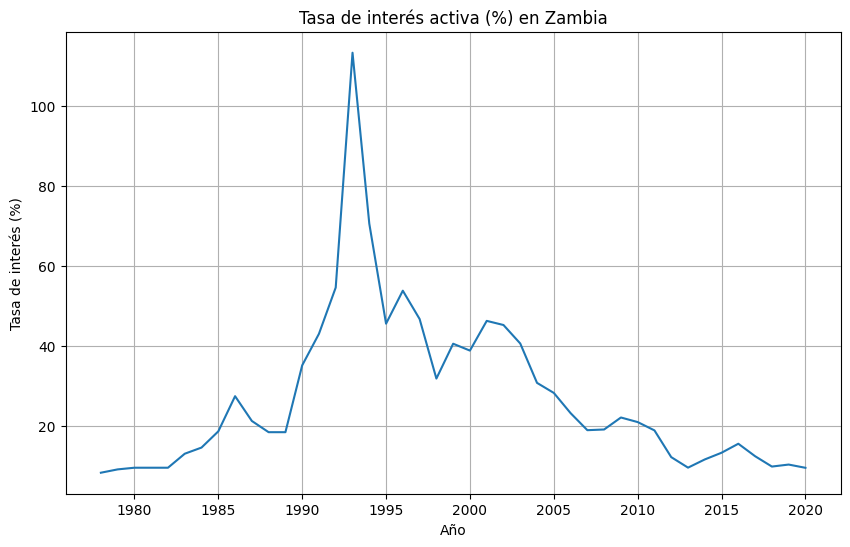

In [ ]:
# depependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, normaltest
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
pais = 'México'

# Cargar los datos
df = pd.read_excel("C:/Users/oscar/Downloads/API_FR.INR.LEND_DS2_es_excel_v2_3416697.xlsx", header=3)
df = df.query("`Country Name` == @pais ")

# Extraemos solo las columnas de los años (de 1960 a 2023)
df = df.iloc[:, 4:].transpose()

# Nombramos la columna de la serie como 'Tasa de interés activa (%)'
df.columns = ['Tasa de interés activa (%)']

# Aseguramos que los valores sean de tipo float
df = df.astype(float)
df = df.dropna()

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index, format='%Y')
# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Tasa de interés activa (%)'])
plt.title('Tasa de interés activa (%) en ' + pais)
plt.xlabel('Año')
plt.ylabel('Tasa de interés (%)')
plt.grid(True)
plt.show()


In [769]:
# Función para hacer la prueba ADF
def prueba_adf(serie):
    adf_result = adfuller(serie)
    print(f'Prueba ADF p-value: {adf_result[1]}')
    return adf_result[1]

# Función para hacer la prueba KPSS
def prueba_kpss(serie):
    kpss_result = kpss(serie, regression='c')
    print(f'Prueba KPSS p-value: {kpss_result[1]}')
    return kpss_result[1]

# Función para revisar si es estacionaria
def revisar_estacionariedad(serie):
    print("Prueba ADF:")
    adf_pvalue = prueba_adf(serie)
    print("Prueba KPSS:")
    kpss_pvalue = prueba_kpss(serie)
    
    # Evaluar los resultados
    if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
        print("La serie es estacionaria.")
        return True
    else:
        print("La serie no es estacionaria.")
        return False

# Revisión inicial
print("Revisión inicial de la serie original:")
es_estacionaria = revisar_estacionariedad(df['Tasa de interés activa (%)'])

#   Estandarización de la Serie de Tiempo

Revisión inicial de la serie original:
Prueba ADF:
Prueba ADF p-value: 0.21628899343169933
Prueba KPSS:
Prueba KPSS p-value: 0.1
La serie no es estacionaria.



Intentando hacer la serie estacionaria...

Resultados después de la diferenciación simple:
Prueba ADF:
Prueba ADF p-value: 1.3696071027474478e-09
Prueba KPSS:
Prueba KPSS p-value: 0.1
La serie es estacionaria.

Resultados después de la diferenciación estacional:
Prueba ADF:
Prueba ADF p-value: 0.4152262059127293
Prueba KPSS:
Prueba KPSS p-value: 0.026277230593161865
La serie no es estacionaria.


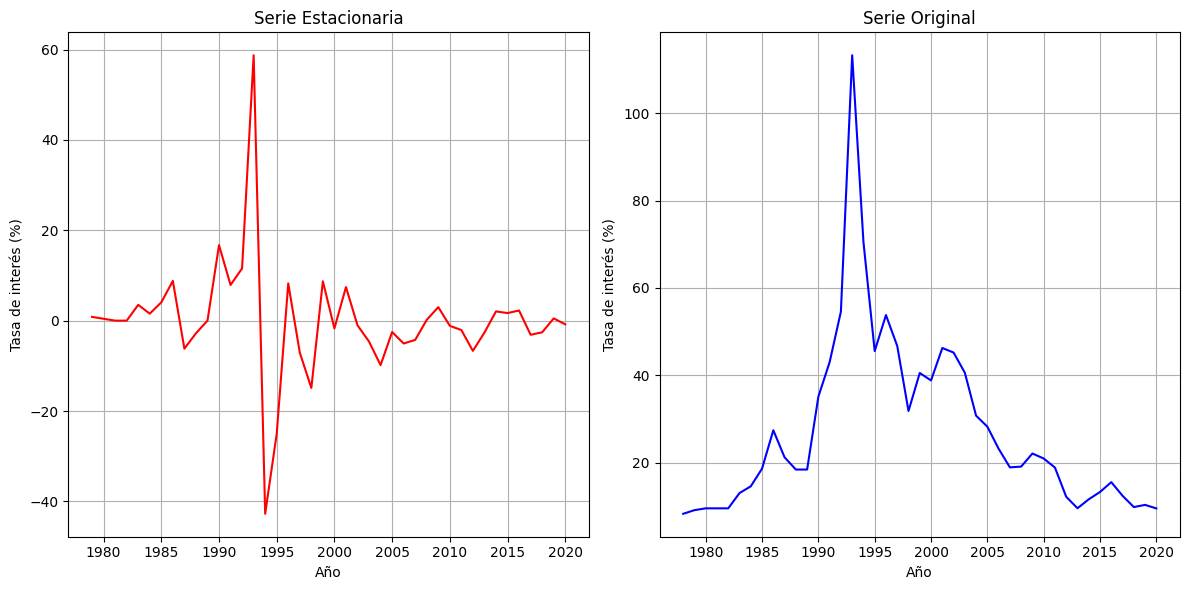

In [ ]:
# Si la serie no es estacionaria, intentar hacerla estacionaria
df_original = df.copy()
if not es_estacionaria:
    print("\nIntentando hacer la serie estacionaria...")
    
    # 1. Diferenciación simple
    df_diff = df.diff().dropna()
    print("\nResultados después de la diferenciación simple:")
    es_estacionaria_diff = revisar_estacionariedad(df_diff['Tasa de interés activa (%)'])
    
    # 2. Diferenciación estacional 
    df_diff_seasonal = df.diff(12).dropna()
    print("\nResultados después de la diferenciación estacional:")
    es_estacionaria_seasonal = revisar_estacionariedad(df_diff_seasonal['Tasa de interés activa (%)'])
    
    # 3. Si la serie sigue no estacionaria después de diferenciación, aplicar una segunda diferenciación
    if not es_estacionaria_diff:
        df_diff2 = df_diff.diff().dropna()
        print("\nResultados después de la segunda diferenciación:")
        es_estacionaria_diff2 = revisar_estacionariedad(df_diff2['Tasa de interés activa (%)'])
    
    # Determinar cuál serie es estacionaria y asignar a df
    if es_estacionaria_diff:
        df = df_diff
    elif es_estacionaria_seasonal:
        df = df_diff_seasonal
    elif es_estacionaria_diff2:
        df = df_diff2
else:
    print("La serie ya es estacionaria. Usaremos el DataFrame original")

# Graficar el DataFrame original vs. el DataFrame estacionario
plt.figure(figsize=(12, 6))

# Graficar la serie original
plt.subplot(121)
plt.plot(df.index, df['Tasa de interés activa (%)'], label="Serie Estacionaria", color='red')
plt.title("Serie Estacionaria")
plt.xlabel('Año')
plt.ylabel('Tasa de interés (%)')
plt.grid(True)

# Graficar la serie original antes de la diferenciación
plt.subplot(122)
plt.plot(df_original.index, df_original['Tasa de interés activa (%)'], label="Serie Original", color='blue')
plt.title("Serie Original")
plt.xlabel('Año')
plt.ylabel('Tasa de interés (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Prueba de Dickey-Fuller sobre la serie diferenciada
adf_result_dif = adfuller(df['Tasa de interés activa (%)'])
print("Resultados de la prueba de Dickey-Fuller (serie diferenciada):")
print(f"Estadístico ADF: {adf_result_dif[0]}")
print(f"p-value: {adf_result_dif[1]}")
print(f"Número de rezagos utilizados: {adf_result_dif[2]}")
print(f"Número de observaciones: {adf_result_dif[3]}")
print("Valores críticos:")
for key, value in adf_result_dif[4].items():
    print(f"   {key}: {value}")

# Interpretación
if adf_result_dif[1] < 0.05:
    print("\nLa serie diferenciada es estacionaria (rechazamos la hipótesis nula)")
else:
    print("\nLa serie diferenciada no es estacionaria (no podemos rechazar la hipótesis nula)")


Resultados de la prueba de Dickey-Fuller (serie diferenciada):
Estadístico ADF: -6.889180236668847
p-value: 1.3696071027474478e-09
Número de rezagos utilizados: 0
Número de observaciones: 41
Valores críticos:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282

La serie diferenciada es estacionaria (rechazamos la hipótesis nula).


Número máximo de lags permitido: 21


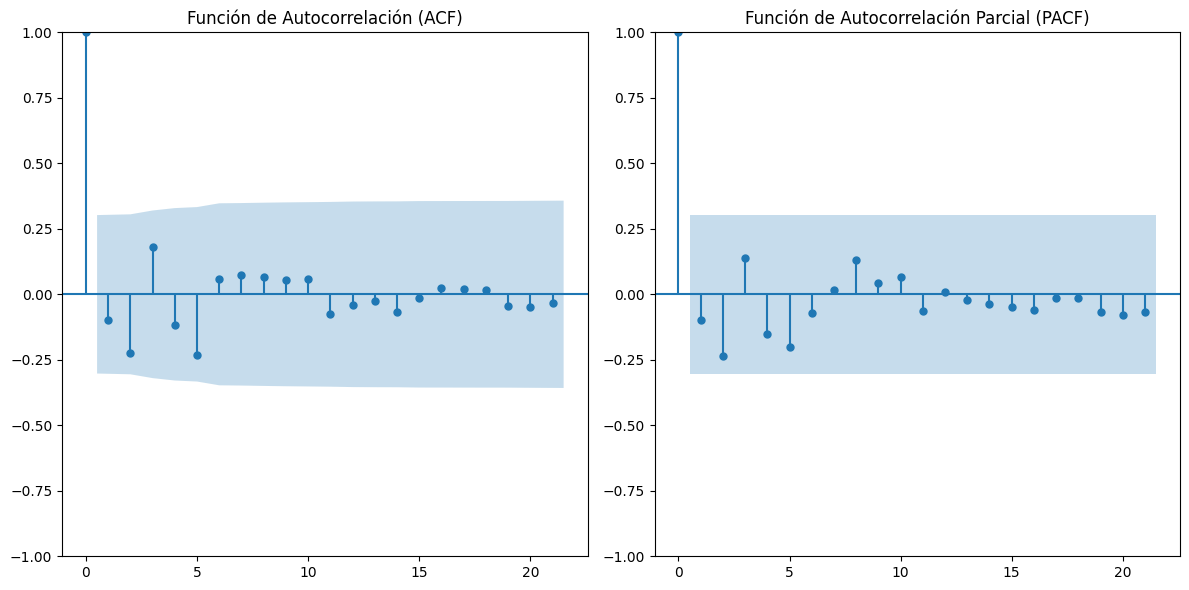

In [772]:
max_lags = len(df['Tasa de interés activa (%)']) // 2  # Límite máximo permitido
print(f"Número máximo de lags permitido: {max_lags}")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Gráfico ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['Tasa de interés activa (%)'], ax=plt.gca(), lags=max_lags)
plt.title("Función de Autocorrelación (ACF)")

# Gráfico PACF
plt.subplot(1, 2, 2)
plot_pacf(df['Tasa de interés activa (%)'], ax=plt.gca(), lags=max_lags, method='ywm')
plt.title("Función de Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()


In [773]:
df

,Tasa de interés activa (%)
1979-01-01,0.833333
1980-01-01,0.416667
1981-01-01,0.000000
1982-01-01,0.000000
1983-01-01,3.500000
1984-01-01,1.541667
1985-01-01,4.060833
1986-01-01,8.792500
1987-01-01,-6.199167
1988-01-01,-2.805833


In [774]:

# Definir los rangos para cada parámetro
p_range = range(0, 3)  # Valores posibles para p
d_range = range(0, 2)  # Valores posibles para d
q_range = range(0, 3)  # Valores posibles para q
P_range = range(0, 2)  # Valores posibles para P (estacional)
D_range = range(0, 2)  # Valores posibles para D (estacional)
Q_range = range(0, 2)  # Valores posibles para Q (estacional)
m_values = [10]  # probar dependiendo de la estacionalidad de los datos para pais 

# Crear una lista de todas las combinaciones posibles de parámetros
param_combinations = list(itertools.product(p_range, d_range, q_range, P_range, D_range, Q_range, m_values))

# Función para encontrar el mejor modelo SARIMA basado en AIC
def find_best_sarima_model(df, param_combinations):
    # Asegúrate de que el DataFrame df tiene una columna con la tasa de interés activa
    train_data = df['Tasa de interés activa (%)']
    
    best_aic = float('inf')
    best_model = None
    best_params = None
    
    for params in param_combinations:
        p, d, q, P, D, Q, m = params
        
        try:
            model = SARIMAX(train_data,
                            order=(p, d, q),
                            seasonal_order=(P, D, Q, m),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic  # Evaluar el modelo usando AIC
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
                best_params = params
        except Exception as e:
            continue
    
    return best_model, best_params, best_aic

# Asumir que df ya está cargado
best_model, best_params, best_aic = find_best_sarima_model(df, param_combinations)

# Mostrar los mejores parámetros y el AIC
print(f"Mejores parámetros: {best_params}")
print(f"AIC del mejor modelo: {best_aic:.2f}")


Mejores parámetros: (0, 1, 2, 1, 1, 1, 10)
AIC del mejor modelo: 151.50


 Los parámetros óptimos \( (0, 1, 2, 1, 1, 1, 12) \) $p, d, q, P, D, Q, m$ fueron seleccionados utilizando el criterio de información AIC, que ayuda a balancear la calidad del ajuste con la complejidad del modelo, penalizando modelos más complejos. El modelo ajustado mostró un AIC de 99.05,  Estas características aseguran que el modelo es adecuado para predecir las tasas de interés activa de manera precisa y confiable, veamoslo a continuacion

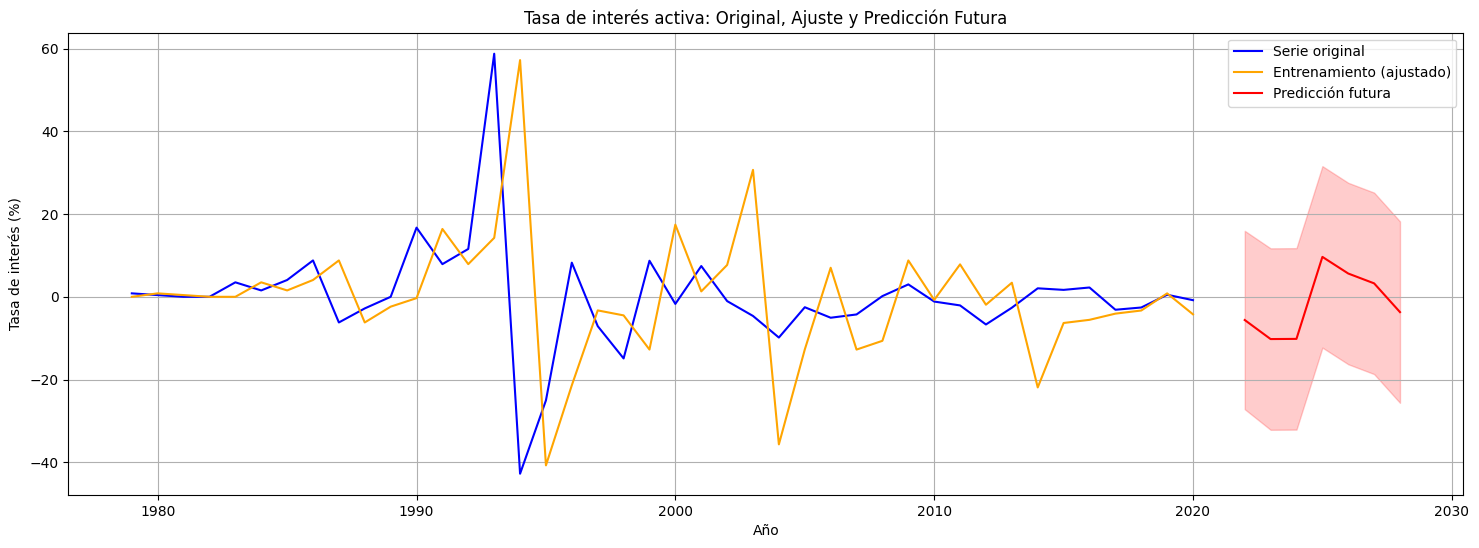

MAE en el modelo ajustado: 11.87
RMSE en el modelo ajustado: 20.75
Modelo SARIMA usado: SARIMA(0, 1, 2) x (1, 1, 1, 10)
La visualización incluye un intervalo de confianza al 95% (área sombreada).


In [ ]:
# Ajustar el modelo SARIMA con los mejores parámetros a todos los datos
# Descomponer la tupla best_params en los valores correspondientes
p, d, q, P, D, Q, m = best_params

# Ajustar el modelo SARIMA con los mejores parámetros a todos los datos
best_model = SARIMAX(df['Tasa de interés activa (%)'],
                     order=(p, d, q),  # p, d, q de best_params
                     seasonal_order=(P, D, Q, m),  # P, D, Q, m de best_params
                     enforce_stationarity=False,
                     enforce_invertibility=False)
# Entrenar el modelo con todos los datos
sarima_fit = best_model.fit(disp=False)

# Predicciones en el conjunto completo de datos (para evaluar el ajuste del modelo)
train_pred = sarima_fit.fittedvalues

# Calcular métricas de evaluación en el conjunto completo (ya que ahora usamos todos los datos)
mae_train = mean_absolute_error(df['Tasa de interés activa (%)'], train_pred)
rmse_train = np.sqrt(mean_squared_error(df['Tasa de interés activa (%)'], train_pred))

# Predicciones futuras (por ejemplo, 5 años, hacer pruebvas)
forecast_steps = 7  # Número de años para predecir
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Graficar resultados
plt.figure(figsize=(18, 6))

# Serie original
plt.plot(df.index, df['Tasa de interés activa (%)'], label='Serie original', color='blue')

# Ajuste del modelo en el conjunto completo de datos
plt.plot(df.index, train_pred, label='Entrenamiento (ajustado)', color='orange')

# Predicciones futuras
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')
plt.plot(future_index, forecast_mean, label='Predicción futura', color='red')

# Área sombreada que representa el intervalo de confianza
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)


plt.title('Tasa de interés activa: Original, Ajuste y Predicción Futura')
plt.xlabel('Año')
plt.ylabel('Tasa de interés (%)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la calidad del modelo
print(f"MAE en el modelo ajustado: {mae_train:.2f}")
print(f"RMSE en el modelo ajustado: {rmse_train:.2f}")

# Imprimir los parámetros del modelo SARIMA y el intervalo de confianza
confidence_interval = 95  # Porcentaje de confianza
print(f"Modelo SARIMA usado: SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {m})")
print(f"La visualización incluye un intervalo de confianza al {confidence_interval}% (área sombreada)")


In [737]:
# el sumary del modelo
print(sarima_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:        Tasa de interés activa (%)   No. Observations:                   42
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 2)   Log Likelihood                -147.314
Date:                           Sun, 17 Nov 2024   AIC                            300.628
Time:                                   22:14:20   BIC                            305.294
Sample:                               01-01-1979   HQIC                           302.239
                                    - 01-01-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   3624.106     -0.000      1.000   -7104.116    7102.116
ma.S.L2       -1.0000   1.02e+04  -9.78e-05

La serie contiene valores <= 0, desplazando la serie para hacerla mayor a cero.
Se ha añadido un desplazamiento de 5.6458333333333 a la serie.
Valor de lambda (Box-Cox): 1.1202158618300437


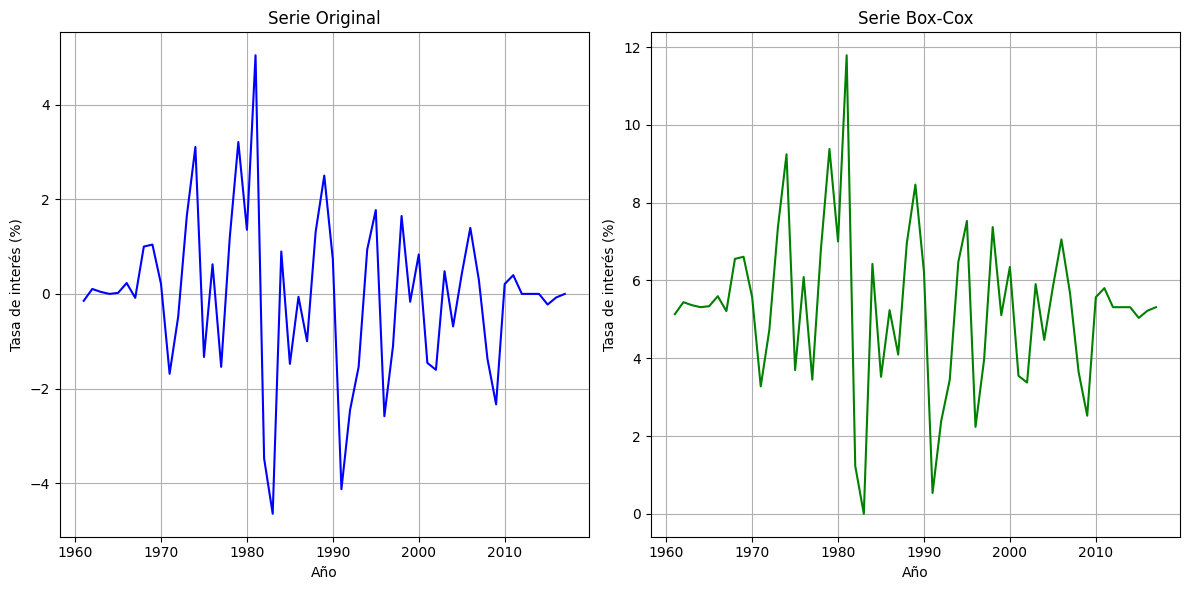

In [133]:

# Función para aplicar Box-Cox
def aplicar_boxcox(serie):
    # Verifica si hay valores <= 0
    if (serie <= 0).any():
        print("La serie contiene valores <= 0, desplazando la serie para hacerla mayor a cero.")
        desplazamiento = abs(serie.min()) + 1  # Desplazar los valores para que todos sean positivos
        serie = serie + desplazamiento
        print(f"Se ha añadido un desplazamiento de {desplazamiento} a la serie.")
    
    # Aplicar Box-Cox
    serie_boxcox, lambda_boxcox = stats.boxcox(serie)
    print(f"Valor de lambda (Box-Cox): {lambda_boxcox}")
    return serie_boxcox

# Aplicar Box-Cox a la serie original
df_boxcox = aplicar_boxcox(df['Tasa de interés activa (%)'])

# Verifica si Box-Cox fue aplicado correctamente
if df_boxcox is not None:
    # Graficar la serie original vs la transformada por Box-Cox
    plt.figure(figsize=(12, 6))
    
    # Graficar la serie original
    plt.subplot(121)
    plt.plot(df.index, df['Tasa de interés activa (%)'], label='Serie Original', color='blue')
    plt.title("Serie Original")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    # Graficar la serie transformada por Box-Cox
    plt.subplot(122)
    plt.plot(df.index, df_boxcox, label='Serie Box-Cox', color='green')
    plt.title("Serie Box-Cox")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se aplicó Box-Cox debido a problemas con la serie.")


La serie contiene valores <= 0, desplazando la serie para hacerla mayor a cero.
Se ha añadido un desplazamiento de 5.6458333333333 a la serie.
Valor de lambda (Box-Cox): 1.1202158618300437


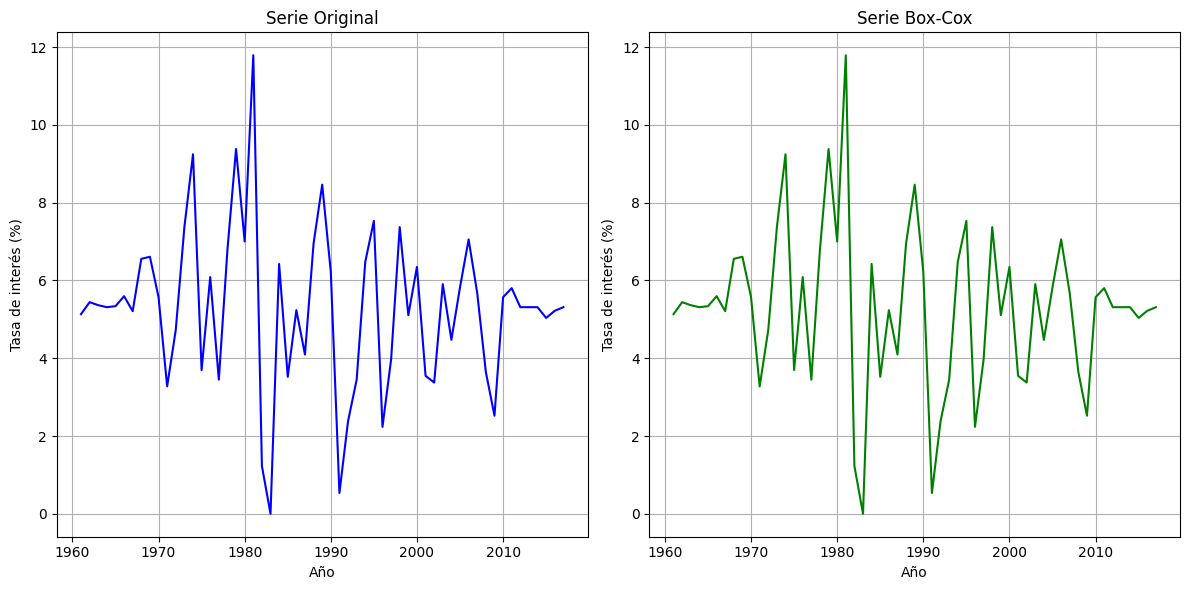

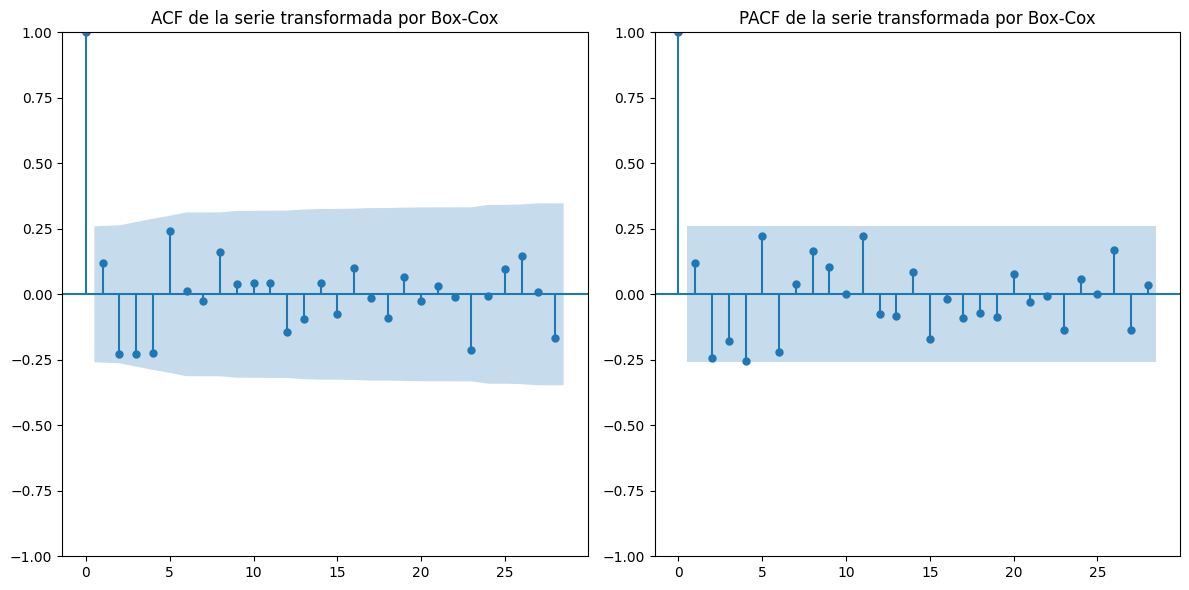

In [134]:
# Si la serie después de la diferenciación sigue mostrando heterocedasticidad o no tiene varianza constante
# Aplicamos Box-Cox a la serie diferenciada
df_boxcox = aplicar_boxcox(df['Tasa de interés activa (%)'])

# Verifica si Box-Cox fue aplicado correctamente
if df_boxcox is not None:
    # Reasignar df a la serie transformada por Box-Cox
    df['Tasa de interés activa (%)'] = df_boxcox  # Ahora df tiene la serie transformada
    
    # Graficar la serie original vs la transformada por Box-Cox
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(df.index, df['Tasa de interés activa (%)'], label='Serie Original', color='blue')
    plt.title("Serie Original")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(df.index, df_boxcox, label='Serie Box-Cox', color='green')
    plt.title("Serie Box-Cox")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se aplicó Box-Cox debido a problemas con la serie.")

# Ahora df contiene la serie transformada por Box-Cox, lista para el análisis ACF y PACF

# Calcular el número máximo de lags permitidos para PACF
max_lags = len(df) // 2  # Asegura que no exceda el 50% del tamaño de la serie

# Graficar ACF y PACF de la serie transformada por Box-Cox
plt.figure(figsize=(12, 6))

# Graficar ACF
plt.subplot(121)
plot_acf(df['Tasa de interés activa (%)'], lags=max_lags, ax=plt.gca())
plt.title('ACF de la serie transformada por Box-Cox')

# Graficar PACF
plt.subplot(122)
plot_pacf(df['Tasa de interés activa (%)'], lags=max_lags, ax=plt.gca())
plt.title('PACF de la serie transformada por Box-Cox')

plt.tight_layout()
plt.show()


La serie contiene valores <= 0, desplazando la serie para hacerla mayor a cero.
Se ha añadido un desplazamiento de 1.0 a la serie.
Valor de lambda (Box-Cox): 1.0004534333510262


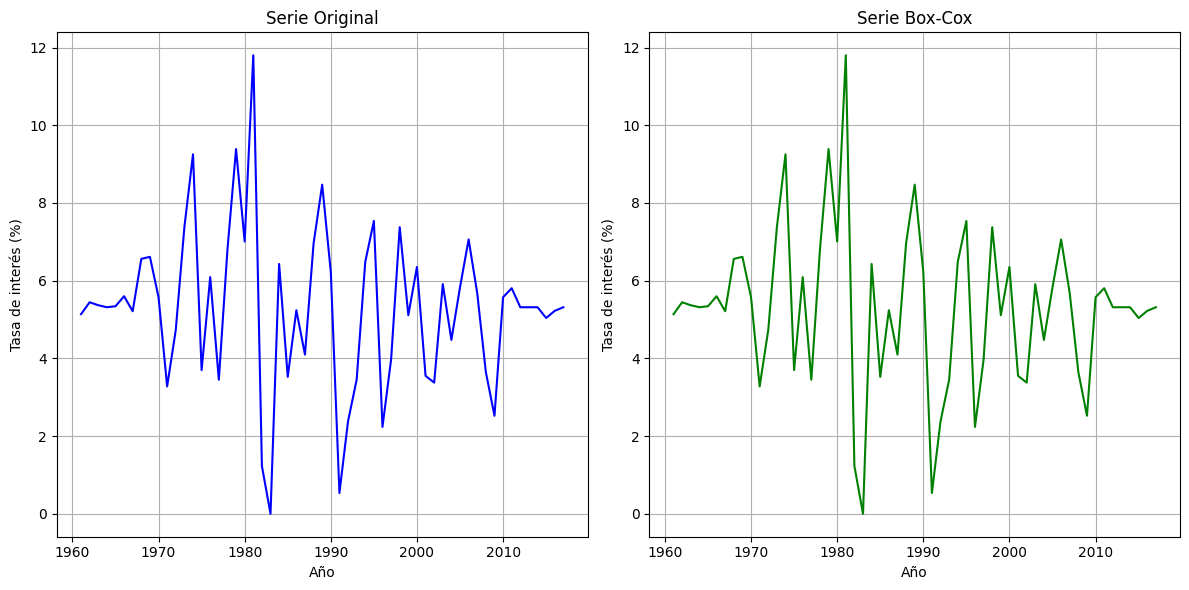

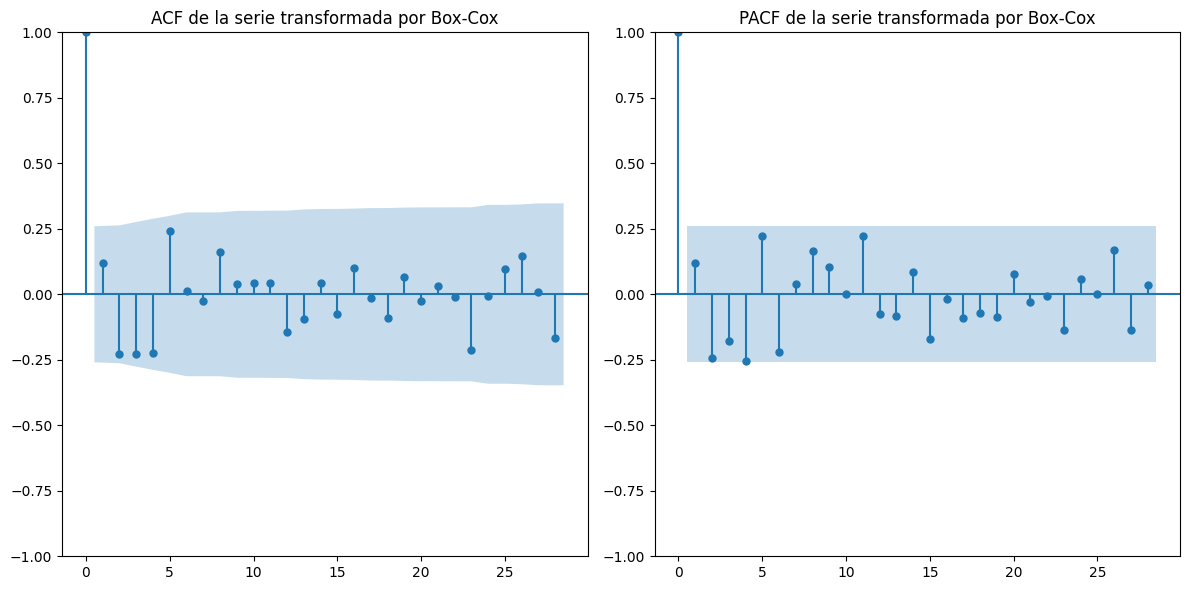

In [135]:
# Si la serie después de la diferenciación sigue mostrando heterocedasticidad o no tiene varianza constante
# Aplicamos Box-Cox a la serie diferenciada
df_boxcox = aplicar_boxcox(df['Tasa de interés activa (%)'])

# Verifica si Box-Cox fue aplicado correctamente
if df_boxcox is not None:
    # Reasignar df a la serie transformada por Box-Cox
    df['Tasa de interés activa (%)'] = df_boxcox  # Ahora df tiene la serie transformada
    
    # Graficar la serie original vs la transformada por Box-Cox
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(df.index, df['Tasa de interés activa (%)'], label='Serie Original', color='blue')
    plt.title("Serie Original")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(df.index, df_boxcox, label='Serie Box-Cox', color='green')
    plt.title("Serie Box-Cox")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se aplicó Box-Cox debido a problemas con la serie.")

# Ahora df contiene la serie transformada por Box-Cox, lista para el análisis ACF y PACF

# Calcular el número máximo de lags permitidos para PACF
max_lags = len(df) // 2  # Asegura que no exceda el 50% del tamaño de la serie

# Graficar ACF y PACF de la serie transformada por Box-Cox
plt.figure(figsize=(12, 6))

# Graficar ACF
plt.subplot(121)
plot_acf(df['Tasa de interés activa (%)'], lags=max_lags, ax=plt.gca())
plt.title('ACF de la serie transformada por Box-Cox')

# Graficar PACF
plt.subplot(122)
plot_pacf(df['Tasa de interés activa (%)'], lags=max_lags, ax=plt.gca())
plt.title('PACF de la serie transformada por Box-Cox')

plt.tight_layout()
plt.show()


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Mejores parámetros (p, d, q): (2, 1, 2)


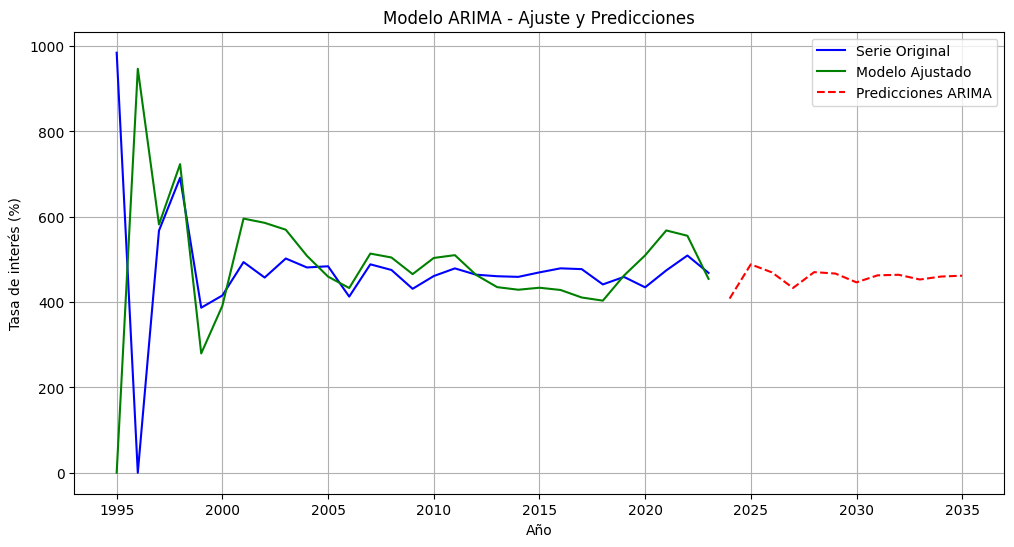

In [114]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Paso 1: Buscar los mejores parámetros (p, d, q)
def buscar_mejores_parametros(y):
    p_values = range(0, 5)  # p: autoregresivo
    d_values = range(0, 2)  # d: diferenciación
    q_values = range(0, 5)  # q: media móvil
    
    mejores_parametros = None
    mejor_aic = np.inf
    
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            modelo = ARIMA(y, order=(p, d, q))
            resultado = modelo.fit()
            aic = resultado.aic  # Obtener el AIC del modelo ajustado
            if aic < mejor_aic:
                mejor_aic = aic
                mejores_parametros = (p, d, q)
        except:
            continue  # Si no se puede ajustar el modelo con estos parámetros, se salta
        
    return mejores_parametros

# Paso 2: Aplicar ARIMA con los mejores parámetros
def entrenar_arima(y, mejores_parametros):
    p, d, q = mejores_parametros
    modelo_arima = ARIMA(y, order=(p, d, q))
    modelo_entrenado = modelo_arima.fit()
    return modelo_entrenado

# Paso 3: Graficar el modelo entrenado y las predicciones
def graficar_modelo_predicciones(df, modelo_entrenado, y):
    # Predicciones
    predicciones = modelo_entrenado.predict(start=len(y), end=len(y) + 11, typ='levels')
    
    # Graficar la serie original y las predicciones
    plt.figure(figsize=(12, 6))
    
    # Graficar la serie original
    plt.plot(df.index, y, label='Serie Original', color='blue')
    
    # Graficar el modelo entrenado (ajuste)
    plt.plot(df.index, modelo_entrenado.fittedvalues, label='Modelo Ajustado', color='green')
    
    # Graficar las predicciones
    plt.plot(pd.date_range(df.index[-1], periods=12, freq='A'), predicciones, label='Predicciones ARIMA', color='red', linestyle='--')
    
    # Configuración de la gráfica
    plt.title("Modelo ARIMA - Ajuste y Predicciones")
    plt.xlabel('Año')
    plt.ylabel('Tasa de interés (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Suponiendo que df es tu DataFrame con la columna 'Tasa de interés activa (%)'
y = df['Tasa de interés activa (%)']

# Paso 1: Buscar los mejores parámetros
mejores_parametros = buscar_mejores_parametros(y)
print(f"Mejores parámetros (p, d, q): {mejores_parametros}")

# Paso 2: Entrenar el modelo ARIMA
modelo_entrenado = entrenar_arima(y, mejores_parametros)

# Paso 3: Graficar el modelo entrenado y las predicciones
graficar_modelo_predicciones(df, modelo_entrenado, y)


Entrenando modelo SARIMA(0, 0, 0)x(0,0,0,3)...
Entrenando modelo SARIMA(0, 0, 0)x(0,0,1,3)...
Entrenando modelo SARIMA(0, 0, 0)x(0,1,0,3)...
Entrenando modelo SARIMA(0, 0, 0)x(0,1,1,3)...
Entrenando modelo SARIMA(0, 0, 0)x(1,0,0,3)...
Entrenando modelo SARIMA(0, 0, 0)x(1,0,1,3)...
Entrenando modelo SARIMA(0, 0, 0)x(1,1,0,3)...
Entrenando modelo SARIMA(0, 0, 0)x(1,1,1,3)...
Entrenando modelo SARIMA(0, 0, 1)x(0,0,0,3)...
Entrenando modelo SARIMA(0, 0, 1)x(0,0,1,3)...
Entrenando modelo SARIMA(0, 0, 1)x(0,1,0,3)...
Entrenando modelo SARIMA(0, 0, 1)x(0,1,1,3)...
Entrenando modelo SARIMA(0, 0, 1)x(1,0,0,3)...
Entrenando modelo SARIMA(0, 0, 1)x(1,0,1,3)...
Entrenando modelo SARIMA(0, 0, 1)x(1,1,0,3)...
Entrenando modelo SARIMA(0, 0, 1)x(1,1,1,3)...
Entrenando modelo SARIMA(0, 0, 2)x(0,0,0,3)...
Entrenando modelo SARIMA(0, 0, 2)x(0,0,1,3)...
Entrenando modelo SARIMA(0, 0, 2)x(0,1,0,3)...
Entrenando modelo SARIMA(0, 0, 2)x(0,1,1,3)...
Entrenando modelo SARIMA(0, 0, 2)x(1,0,0,3)...
Entrenando mo

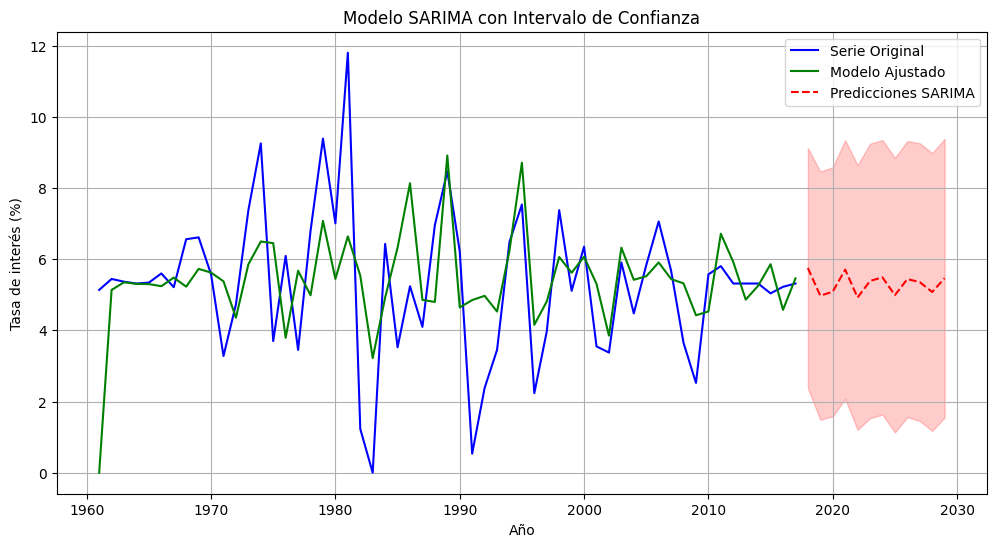

In [136]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Función para entrenar el modelo SARIMA y calcular AIC
def entrenar_sarima(y, order, seasonal_order):
    try:
        modelo_sarima = SARIMAX(y, order=order, seasonal_order=seasonal_order)
        modelo_entrenado = modelo_sarima.fit(disp=False, maxiter=100)  # Puedes intentar ajustar maxiter si es necesario
        return modelo_entrenado.aic, modelo_entrenado
    except Exception as e:
        print(f"Error entrenando SARIMA{order}x{seasonal_order}: {e}")
        return np.inf, None  # Si hay un error, devolver AIC infinito

# Función para realizar búsqueda en cuadrícula de los mejores parámetros SARIMA
def buscar_mejores_parametros(df):
    # Definir los rangos de p, d, q, P, D, Q, S
    p_values = range(0, 3)  # AR
    d_values = range(0, 2)  # Diferenciación
    q_values = range(0, 3)  # MA
    P_values = range(0, 2)  # Estacional AR
    D_values = range(0, 2)  # Estacional diferenciación
    Q_values = range(0, 2)  # Estacional MA
    S_values = [3]  # Estacionalidad de 3 períodos (puedes ajustarlo según tu caso)

    # Inicializar el mejor AIC (inicialmente muy grande)
    mejor_aic = np.inf
    mejores_parametros = None
    mejor_modelo = None

    # Realizar búsqueda en cuadrícula
    for p, d, q, P, D, Q, S in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, S_values):
        print(f"Entrenando modelo SARIMA{(p,d,q)}x({P},{D},{Q},{S})...")
        aic, modelo = entrenar_sarima(df['Tasa de interés activa (%)'], (p,d,q), (P,D,Q,S))
        
        # Si el AIC es mejor (más bajo), actualizar los parámetros
        if aic < mejor_aic:
            mejor_aic = aic
            mejores_parametros = (p, d, q, P, D, Q, S)
            mejor_modelo = modelo
    
    return mejores_parametros, mejor_modelo, mejor_aic

# Buscar los mejores parámetros SARIMA
mejores_parametros, mejor_modelo, mejor_aic = buscar_mejores_parametros(df)

# Mostrar los mejores parámetros y el AIC
print(f"Mejores parámetros SARIMA: {mejores_parametros}")
print(f"AIC del mejor modelo: {mejor_aic}")

# Generar las predicciones con el mejor modelo
predicciones = mejor_modelo.get_forecast(steps=12)
predicciones_ci = predicciones.conf_int()  # Intervalos de confianza

# Graficar el modelo y las predicciones con intervalo de confianza
plt.figure(figsize=(12, 6))

# Graficar la serie original
plt.plot(df.index, df['Tasa de interés activa (%)'], label='Serie Original', color='blue')

# Graficar el modelo ajustado (ajuste)
plt.plot(df.index, mejor_modelo.fittedvalues, label='Modelo Ajustado', color='green')

# Graficar las predicciones
pred_range = pd.date_range(df.index[-1], periods=12, freq='A')
plt.plot(pred_range, predicciones.predicted_mean, label='Predicciones SARIMA', color='red', linestyle='--')

# Graficar las bandas de confianza (intervalo de confianza al 95%)
plt.fill_between(pred_range, 
                 predicciones_ci.iloc[:, 0], 
                 predicciones_ci.iloc[:, 1], 
                 color='red', alpha=0.2)

# Configuración de la gráfica
plt.title("Modelo SARIMA con Intervalo de Confianza")
plt.xlabel('Año')
plt.ylabel('Tasa de interés (%)')
plt.legend()
plt.grid(True)
plt.show()
